In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']

from ipywidgets import interact
import ipywidgets as widgets

In [2]:
plt.rcdefaults()
plt.rcParams.update({'figure.dpi':100})
#plt.rcParams.update({'figure.autolayout':'True'})
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'mathtext.default':'regular'})
plt.rcParams.update({'mathtext.fontset':'stixsans'})
plt.rcParams.update({'axes.linewidth': 1.5})
plt.rcParams.update({'xtick.major.width': 1.25 })
plt.rcParams.update({'xtick.minor.size': 2.5})
plt.rcParams.update({'xtick.minor.width': 1.25 })
plt.rcParams.update({'ytick.major.size': 5})
plt.rcParams.update({'ytick.major.width': 1.25 })
plt.rcParams.update({'ytick.minor.size': 2.5})
plt.rcParams.update({'ytick.minor.width': 1.25 })
plt.rc('legend',**{'fontsize':'x-small'})
#plt.figure(1,figsize = [11.0, 8.5])
plt.rcParams.update({'xtick.direction':'in'})
plt.rcParams.update({'ytick.direction':'in'})
plt.rcParams.update({'xtick.top':'True'})
plt.rcParams.update({'ytick.right':'True'})
#plt.rcParams.update({'axes.formatter.limits': (-2, 2)})
plt.rcParams.update({'lines.markersize': 8}) #6 is the default
plt.rcParams.update({'legend.framealpha': 1.0})
plt.rcParams.update({'legend.fancybox': 'False'})
#plt.rcParams.update({'axes.grid':'True'})

In [3]:
# Global variables
Percentages = [0.6827, 0.9545]

In [4]:
def get_levels(loglike):
    ds = np.sort(np.exp(-0.5*loglike).flatten())[::-1]
    cs = np.cumsum(ds)
    cs /= cs[-1]
    return np.array([ds[np.argmax(cs > l)] for l in Percentages])[::-1]

alpha = 2
betay = 0
gammax = 0
gammay = 1.5
const = 0

@interact(alpha= widgets.FloatSlider(min=-5, max=5),
          betax= widgets.FloatSlider(min=-5, max=5))

def plot_likelihood(betax):
    xyrange = (-10,10)
    x, y = np.meshgrid(*2*[np.linspace(*xyrange, 1000)])

    loglike = x**2 + y**2 + np.exp(alpha)*(betax*x**2 + betay*y**2 - gammax*x - gammay*y + const)**2

    plt.gca().set_aspect(1)
    plt.contour(np.exp(-0.5*loglike), extent=2*xyrange, levels=get_levels(loglike))
    plt.xlim((-3,3))
    plt.ylim((-3,3))

interactive(children=(FloatSlider(value=0.0, description='betax', max=5.0, min=-5.0), Output()), _dom_classes=…

In [5]:
def normalize(l, x):
    raw_sum = np.trapz(l, x)
    return l/raw_sum

# marginalize over param y for axis = 0,
#                        x for axis = 1
# a denotes x or y
def marginalize(L, a, axis):
    l_axis = np.sum(L, axis=axis)
    l_normed = normalize(l_axis, a)
    return l_normed

# maximize over param y
def maximize(L, x, y, mean_y):
    pos = np.where(y==mean_y)[0][0]
    l = L[pos]
    return normalize(l, x)

In [6]:
xyrange = (-10,10)
X, Y = np.meshgrid(*2*[np.linspace(*xyrange, 1001)])
x = X[0]
y = Y.T[0]

Alpha = 2
Betaxs = np.linspace(-5, 5, 101)
Gammay = 1.5

Log_Likelihoods = []

for i in range(len(Betaxs)):
    Betax = Betaxs[i]
    loglike = X**2 + Y**2 + np.exp(Alpha)*(Betax*X**2 - Gammay*Y)**2
    Log_Likelihoods.append(loglike)

Likelihoods is a set of 101 likelihood distributions for different $\beta_x$ values

In [7]:
l = Log_Likelihoods[np.argmax(Betaxs==0)]
l1 = Log_Likelihoods[np.argmax(Betaxs>=1.5)]

L = np.exp(-0.5*l)
L1 = np.exp(-0.5*l1)

$\mathcal{L}$ is the log likelihood surface for $\beta_x=0$, i.e. a Gaussian likelihood surface.

$\mathcal{L}_1$ is the log likelihood surface for $\beta_x=1.5$.

Assume from now on that y is the nuisance parameter that we integrate over (avoid binodality). To implement equation 7, we need to take the derivate of $\mathcal{L}$ with repect to $y$.

In [8]:
def get_tk_marg(loglike):
    dL = np.gradient(loglike, y, axis=0, edge_order=2)
    ddL = np.gradient(dL, y, axis=0, edge_order=2)

    L_marg = loglike - 0.5*dL*(1/ddL)*dL + np.log(0.5*ddL)

    fig, ax = plt.subplots(1, 1)
    cset = ax.contour(X, Y, L_marg)
    ax.set_aspect('equal')
    plt.clabel(cset, inline=True)
    ax.set_xlabel('x')
    ax.set_ylabel(r'$y_0$')
    return normalize(np.exp(-0.5*L_marg)[Y==0], x)

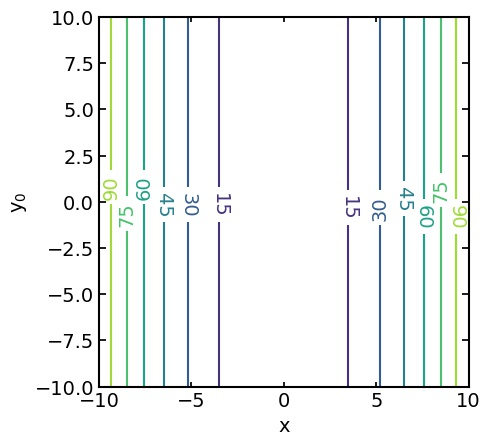

In [9]:
L_tk_marg = get_tk_marg(l)

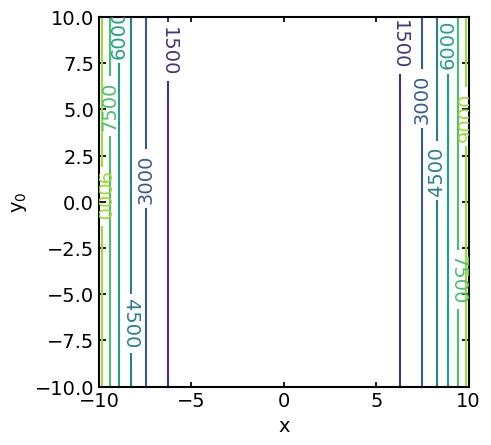

In [10]:
L1_tk_marg = get_tk_marg(l1)

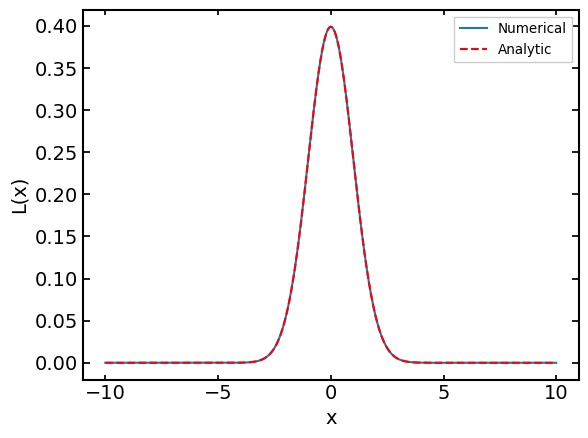

In [11]:
L_marg = marginalize(L, y, 0)
L_tk_marg_normed = normalize(L_tk_marg, x)
fig, ax = plt.subplots(1, 1)
ax.plot(x, L_marg, label='Numerical')
ax.plot(x, L_tk_marg_normed, 'r--', label='Analytic')
ax.set_xlabel('x')
ax.set_ylabel('L(x)')
ax.legend()

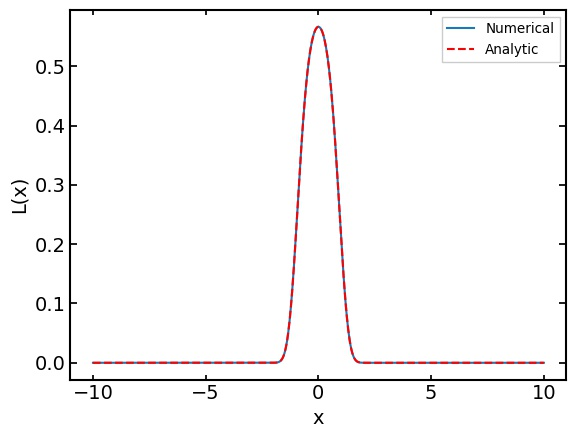

In [12]:
L1_marg = marginalize(L1, y, 0)
L1_tk_marg_normed = normalize(L1_tk_marg, x)
fig, ax = plt.subplots(1, 1)
ax.plot(x, L1_marg, label='Numerical')
ax.plot(x, L1_tk_marg_normed, 'r--', label='Analytic')
ax.set_xlabel('x')
ax.set_ylabel('L(x)')
ax.legend()

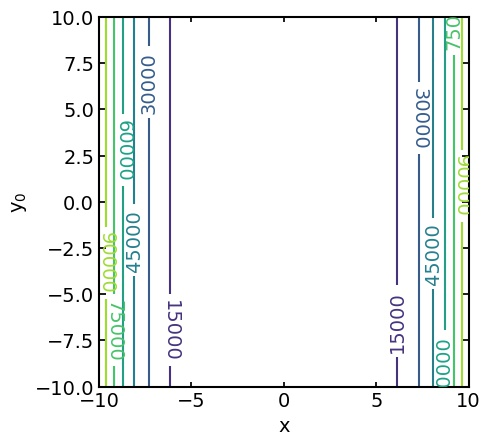

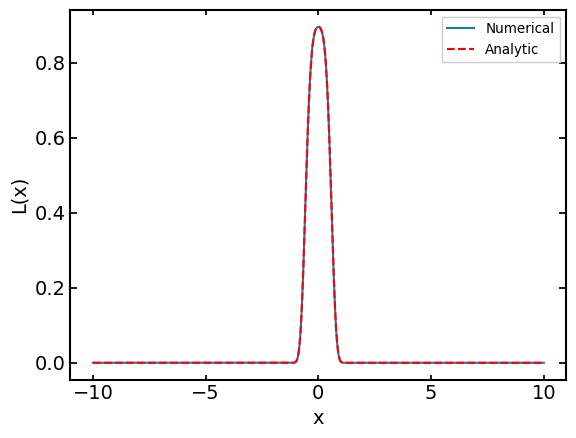

In [13]:
l0 = Log_Likelihoods[0]
L0 = np.exp(-0.5*l0)
L0_tk_marg = get_tk_marg(l0)
L0_marg = marginalize(L0, y, 0)
L0_tk_marg_normed = normalize(L0_tk_marg, x)
fig, ax = plt.subplots(1, 1)
ax.plot(x, L0_marg, label='Numerical')
ax.plot(x, L0_tk_marg_normed, 'r--', label='Analytic')
ax.set_xlabel('x')
ax.set_ylabel('L(x)')
ax.legend()

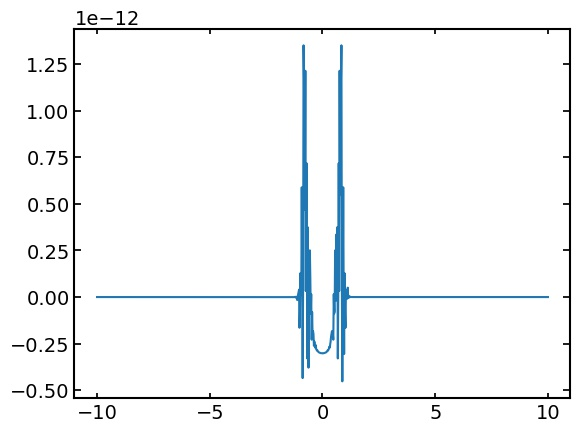

In [14]:
plt.plot(x, (L0_marg-L0_tk_marg_normed))

In [15]:
def get_tk_marg(loglike):
    dL = np.gradient(loglike, y, axis=0, edge_order=2)
    ddL = np.gradient(dL, y, axis=0, edge_order=2)

    L_marg = loglike - 0.5*dL*(1/ddL)*dL + np.log(0.5*ddL)
    return np.exp(-0.5*L_marg)[Y==0]

In [16]:
diff = []
for i in range(len(Log_Likelihoods)):
    l = Log_Likelihoods[i]
    L = np.exp(-0.5*l)
    L_tk_marg = normalize(get_tk_marg(l), x)
    L_marg = marginalize(L, y, 0)
    diff.append(np.max(np.abs(L_marg-L_tk_marg)))

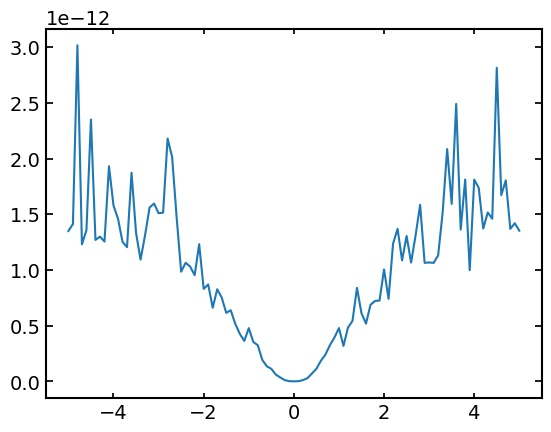

In [17]:
plt.plot(Betaxs, np.array(diff))

# What if we change the form of non-Gaussianity? #

## Rotation ##

In [22]:
@interact(alpha= widgets.FloatSlider(min= -2, max=2))
def plot_like(alpha):
    xyrange = (-100,100)
    x, y = np.meshgrid(*2*[np.linspace(*xyrange, 1000)])
    
    cov = np.array([[2,1],
                    [1,1]])
    invcov = np.linalg.inv(cov)
    v = np.array([x, y - alpha*x**2])
    like = np.exp(-0.5*np.einsum('ikl,ij,jkl->kl', v, invcov, v))/((2*np.pi)**cov.shape[0]*np.linalg.det(cov))
    # loglike = x**2 + y**2 + np.exp(alpha)*(betax*x**2 + betay*y**2 - gammax*x - gammay*y + const)**2

    plt.gca().set_aspect(1)
    plt.contour(like, extent=2*xyrange, levels=get_levels(like))
    plt.xlim((-100,100))
    plt.ylim((-100,100))

interactive(children=(FloatSlider(value=0.0, description='alpha', max=2.0, min=-2.0), Output()), _dom_classes=…

In [19]:
np.linspace(*xyrange, 1000)

array([-10.        ,  -9.97997998,  -9.95995996,  -9.93993994,
        -9.91991992,  -9.8998999 ,  -9.87987988,  -9.85985986,
        -9.83983984,  -9.81981982,  -9.7997998 ,  -9.77977978,
        -9.75975976,  -9.73973974,  -9.71971972,  -9.6996997 ,
        -9.67967968,  -9.65965966,  -9.63963964,  -9.61961962,
        -9.5995996 ,  -9.57957958,  -9.55955956,  -9.53953954,
        -9.51951952,  -9.4994995 ,  -9.47947948,  -9.45945946,
        -9.43943944,  -9.41941942,  -9.3993994 ,  -9.37937938,
        -9.35935936,  -9.33933934,  -9.31931932,  -9.2992993 ,
        -9.27927928,  -9.25925926,  -9.23923924,  -9.21921922,
        -9.1991992 ,  -9.17917918,  -9.15915916,  -9.13913914,
        -9.11911912,  -9.0990991 ,  -9.07907908,  -9.05905906,
        -9.03903904,  -9.01901902,  -8.998999  ,  -8.97897898,
        -8.95895896,  -8.93893894,  -8.91891892,  -8.8988989 ,
        -8.87887888,  -8.85885886,  -8.83883884,  -8.81881882,
        -8.7987988 ,  -8.77877878,  -8.75875876,  -8.73